In [7]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [19]:
import pandas as pd 

training_file_path = (r"/home/kunal/Projects/Digit_recognizer/train.csv")
df_train = pd.read_csv(training_file_path)
test_file_path = (r"/home/kunal/Projects/Digit_recognizer/test.csv")
df_test = pd.read_csv(test_file_path)

In [20]:
# Adding the training file and seperating the label column into a diff variable
X = df_train.drop('label', axis =1)
y = df_train['label']
print("the shape of X is", X.shape)
print("the shape of y is", y.shape)
X_test = df_test.drop('label',axis =1)
y_test = df_test['label']

the shape of X is (42000, 784)
the shape of y is (42000,)


KeyError: "['label'] not found in axis"

In [10]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
# Splitting the data 
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
print("X_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)
y_train = np.eye(10)[y_train]  # Assuming y_train is integer-encoded
y_val = np.eye(10)[y_val]
print("------")
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)


X_train shape (33600, 784)
X_val shape (8400, 784)
y_train shape (33600,)
y_val shape (8400,)
------
y_train shape (33600, 10)
y_val shape (8400, 10)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(784, activation ='relu', input_shape =[784]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax'),
])

2024-01-30 17:41:28.954799: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 17:41:29.130961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 17:41:29.131080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 17:41:29.156031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 17:41:29.217825: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 17:41:29.219236: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [22]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
print(y_train.shape, y_val.shape)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
    verbose=2, # hide the output because we have so many epochs
)

(33600, 10) (8400, 10)
Epoch 1/100
132/132 - 4s - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0946 - val_accuracy: 0.9760 - 4s/epoch - 28ms/step
Epoch 2/100
132/132 - 4s - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0952 - val_accuracy: 0.9764 - 4s/epoch - 29ms/step
Epoch 3/100
132/132 - 4s - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0917 - val_accuracy: 0.9769 - 4s/epoch - 30ms/step
Epoch 4/100
132/132 - 4s - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.1006 - val_accuracy: 0.9757 - 4s/epoch - 29ms/step
Epoch 5/100
132/132 - 4s - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0943 - val_accuracy: 0.9763 - 4s/epoch - 29ms/step
Epoch 6/100
132/132 - 4s - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0873 - val_accuracy: 0.9794 - 4s/epoch - 28ms/step
Epoch 7/100
132/132 - 4s - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.0879 - val_accuracy: 0.9779 - 4s/epoch - 27ms/step
Epoch 8/100
132/132 - 4s - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0946 - val_accuracy: 0.9769 - 4s/epo

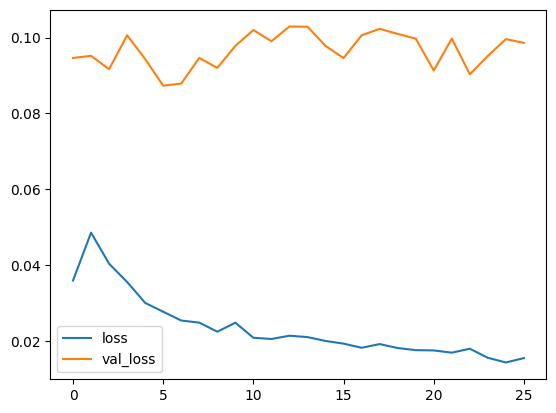

In [23]:
import matplotlib
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

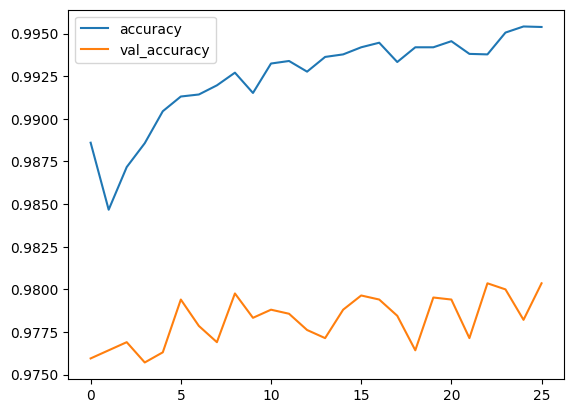

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();